# Logistic Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ml
from logisticClassify import *

## Export and Handle Data


In [2]:
iris = np.genfromtxt("data/iris.txt", delimiter=None)
X, Y = iris[:, 0:2], iris[:, -1]  # get first two features & target
X, Y = ml.shuffleData(X, Y)  # reorder randomly (important later)
X, _ = ml.rescale(X)  # works much better on rescaled data

XA, YA = X[Y < 2, :], Y[Y < 2]  # get class 0 vs 1
XB, YB = X[Y > 0, :], Y[Y > 0]  # get class 1 vs 2

print(XA.shape, YA.shape)
print(XB.shape, YB.shape)

(99, 2) (99,)
(99, 2) (99,)


## Show the two classes in a scatter plot


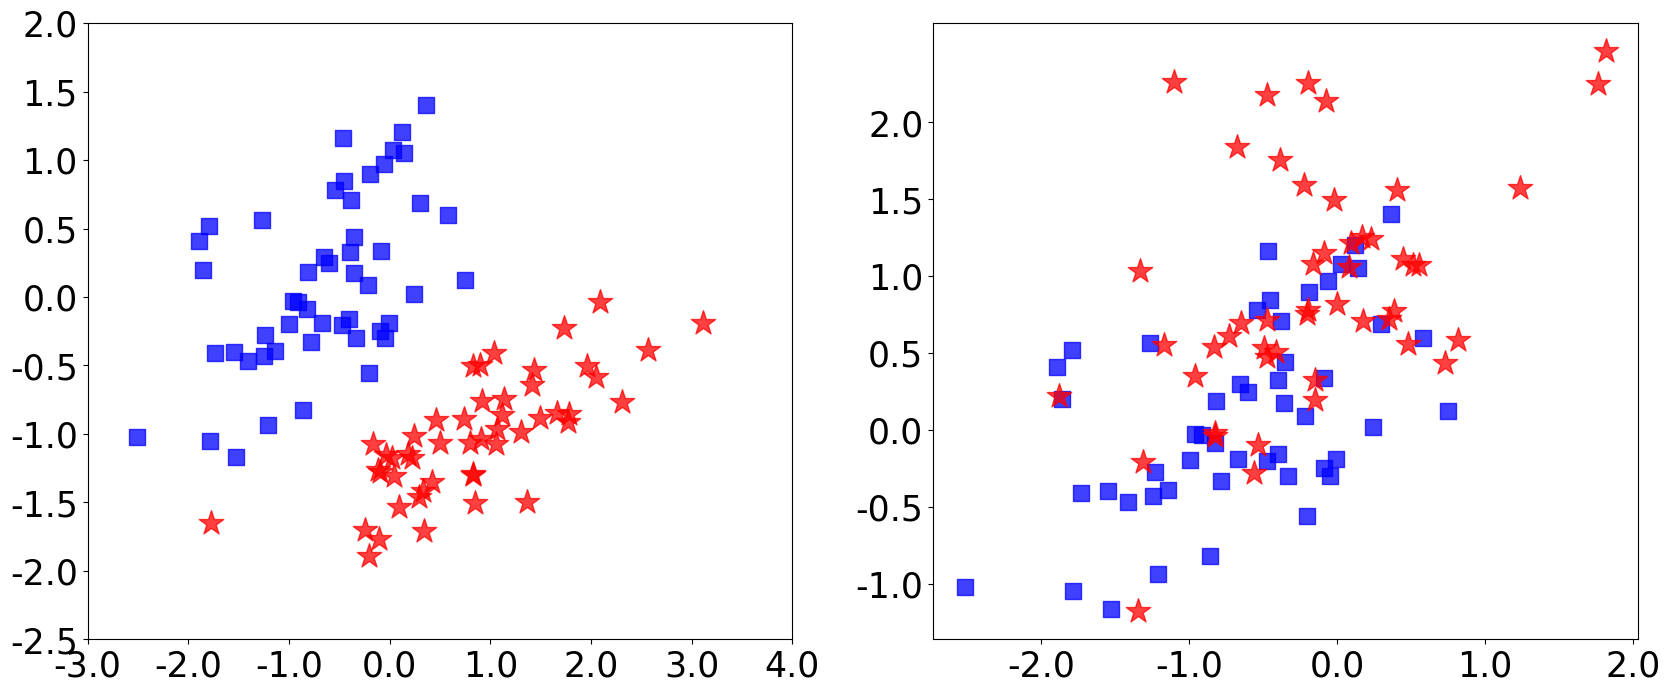

In [3]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

maskA = YA == 1

ax[0].scatter(XA[maskA, 0], XA[maskA, 1], s=120, color="blue", marker="s", alpha=0.75)
ax[0].scatter(XA[~maskA, 0], XA[~maskA, 1], s=340, color="red", marker="*", alpha=0.75)

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_xticklabels(ax[0].get_xticks(), fontsize=25)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=25)

maskB = YB == 1

ax[1].set_xticks(ax[0].get_xticks())
ax[1].set_yticks(ax[0].get_yticks())
ax[1].scatter(XB[maskB, 0], XB[maskB, 1], s=120, color="blue", marker="s", alpha=0.75)
ax[1].scatter(XB[~maskB, 0], XB[~maskB, 1], s=340, color="red", marker="*", alpha=0.75)

ax[1].set_xticklabels(ax[1].get_xticks(), fontsize=25)
ax[1].set_yticklabels(ax[1].get_yticks(), fontsize=25)

plt.show()

## Train the logistic regression model


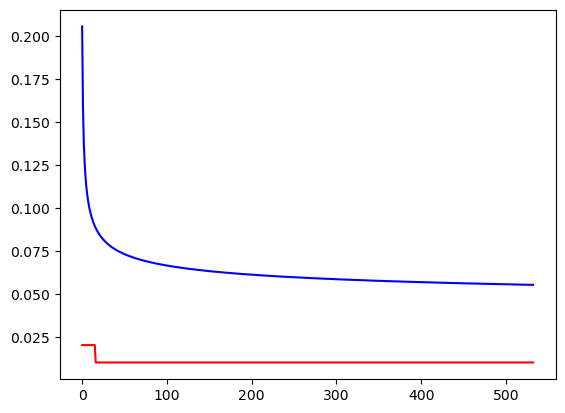

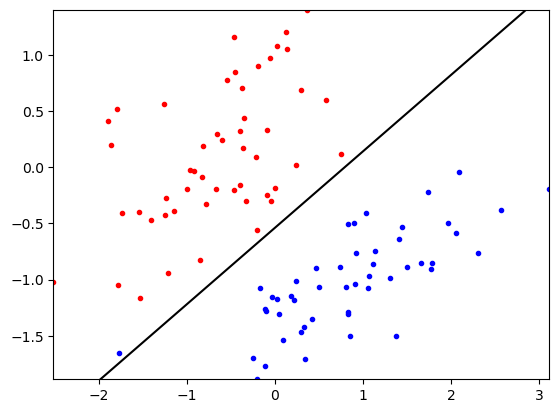

Training error rate:  0.010101010101010102


/Users/harryxiong24/Code/Study/machine-learning-collection/linear-classification/utils/plot.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


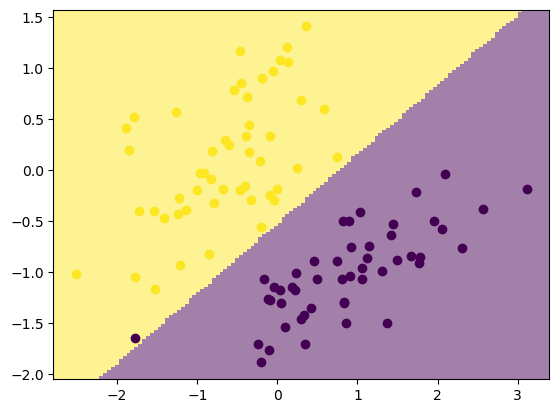

In [4]:
learnerA = logisticClassify()
learnerA.theta = np.array([0.0, 0.0, 0.0])
learnerA.train(XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5)
plt.show()

ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))
plt.show()

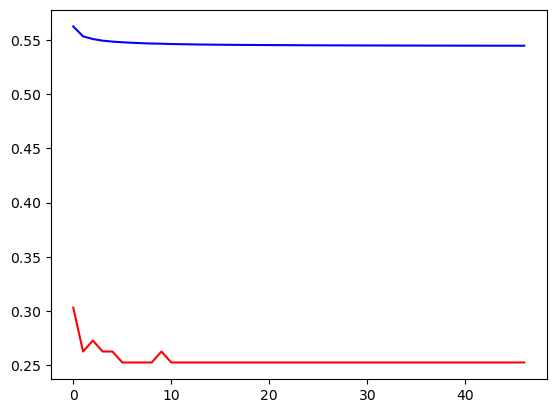

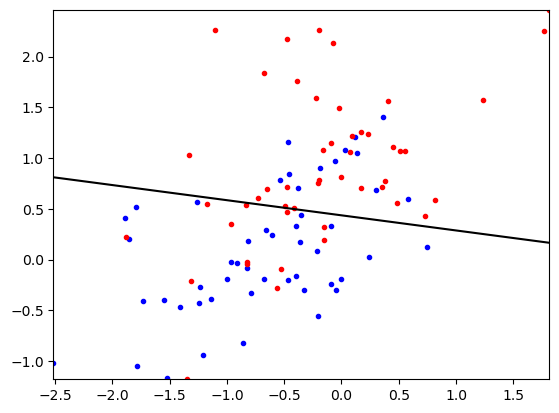

Training error rate:  0.25252525252525254


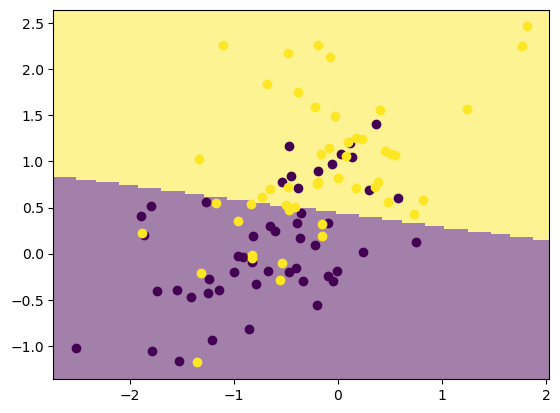

In [5]:
learnerB = logisticClassify()
learnerB.theta = np.array([0.0, 0.0, 0.0])
learnerB.train(XB, YB, initStep=1e-1, stopEpochs=1000, stopTol=1e-5)

plt.show()
ml.plotClassify2D(learnerB, XB, YB)
print("Training error rate: ", learnerB.err(XB, YB))
plt.show()

## L1 Regularization


In [6]:
def L1(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha=2):
    """Train the logistic regression using stochastic gradient descent"""
    M, N = X.shape
    # initialize the model if necessary:
    self.classes = np.unique(Y)
    # Y may have two classes, any values
    XX = np.hstack((np.ones((M, 1)), X))  # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y, self.classes)
    # YY is Y, but with canonical values 0 or 1
    if len(self.theta) != N + 1:
        self.theta = np.random.rand(N + 1)
    # init loop variables:
    epoch = 0
    done = False
    Jnll = []
    J01 = []
    while not done:
        stepsize, epoch = initStep * 2.0 / (2.0 + epoch), epoch + 1
        # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = XX[i].dot(self.theta)
            # TODO: compute linear response r(x)
            sigmoid = 1.0 / (1.0 + np.exp(-ri))
            gradi = (
                -(1 - sigmoid) * XX[i, :]
                if YY[i]
                else sigmoid * XX[i, :] + alpha * np.sign(self.theta + 1e-200)
            )
            # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi
            # take a gradient step

        J01.append(self.err(X, Y))  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1.0 / (1.0 + np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY * np.log(S) + (1 - YY) * np.log(1 - S)) + alpha * np.sum(
            np.abs(self.theta)
        )
        Jnll.append(Jsur)  # TODO evaluate the current NLL loss
        plt.pause(0.01)
        # let OS draw the plot

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch >= stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol)
        # or if Jnll not changing between epochs ( < stopTol )
    plt.figure(1)
    plt.plot(Jnll, "b-", J01, "r-")
    plt.draw()
    # plot losses
    if N == 2:
        plt.figure(2)
        self.plotBoundary(X, Y)
        plt.draw()
        # & predictor if 2D

Training error rate:  0.5050505050505051


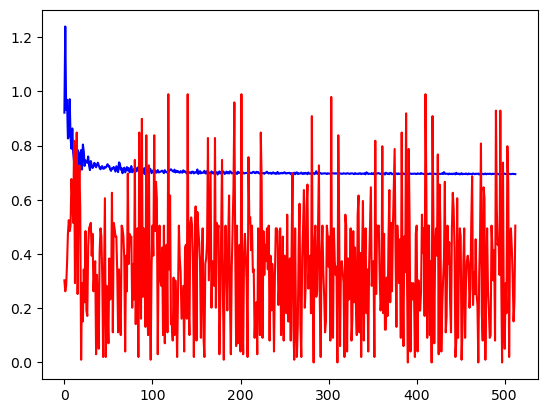

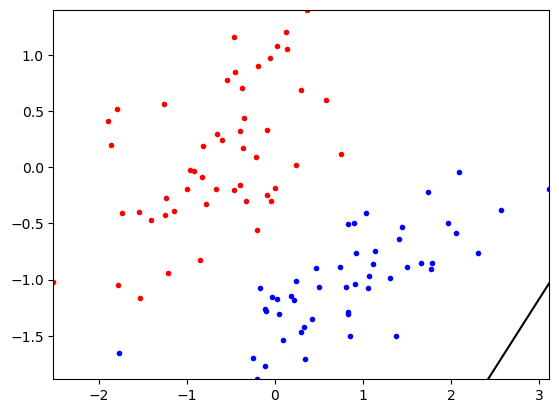

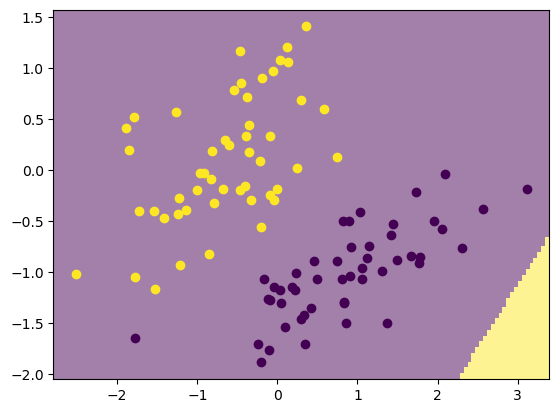

In [7]:
class myLogistic1(logisticClassify):  # override methods here for solution doc
    regularize_train = L1


learnerA = myLogistic1()
learnerA.theta = np.array([0.0, 0.0, 0.0])
learnerA.regularize_train(XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5, alpha=2)
plt.figure()

ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))

## L2 Regularization


In [8]:
def L2(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha=2):
    """Train the logistic regression using stochastic gradient descent"""
    M, N = X.shape
    # initialize the model if necessary:
    self.classes = np.unique(Y)
    # Y may have two classes, any values
    XX = np.hstack((np.ones((M, 1)), X))  # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y, self.classes)
    # YY is Y, but with canonical values 0 or 1
    if len(self.theta) != N + 1:
        self.theta = np.random.rand(N + 1)
    # init loop variables:
    epoch = 0
    done = False
    Jnll = []
    J01 = []
    while not done:
        stepsize, epoch = initStep * 2.0 / (2.0 + epoch), epoch + 1
        # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = XX[i].dot(self.theta)
            # TODO: compute linear response r(x)
            sigmoid = 1.0 / (1.0 + np.exp(-ri))
            gradi = (
                -(1 - sigmoid) * XX[i, :]
                if YY[i]
                else sigmoid * XX[i, :] + 2 * alpha * self.theta
            )
            # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi
            # take a gradient step

        J01.append(self.err(X, Y))  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1.0 / (1.0 + np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY * np.log(S) + (1 - YY) * np.log(1 - S)) + alpha * np.sum(
            np.square(self.theta)
        )
        Jnll.append(Jsur)  # TODO evaluate the current NLL loss
        plt.pause(0.01)
        # let OS draw the plot

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch >= stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol)
        # or if Jnll not changing between epochs ( < stopTol )
    plt.figure(1)
    plt.plot(Jnll, "b-", J01, "r-")
    plt.draw()
    # plot losses
    if N == 2:
        plt.figure(2)
        self.plotBoundary(X, Y)
        plt.draw()
        # & predictor if 2D

Training error rate:  0.08080808080808081


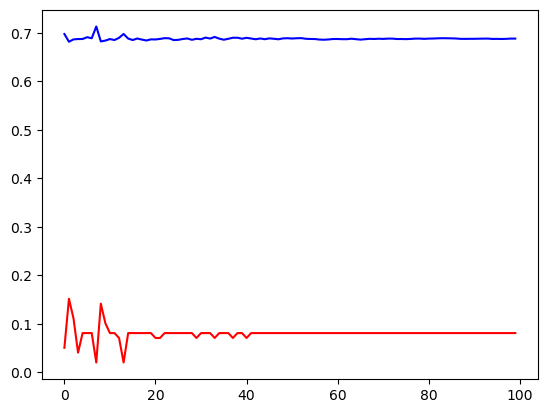

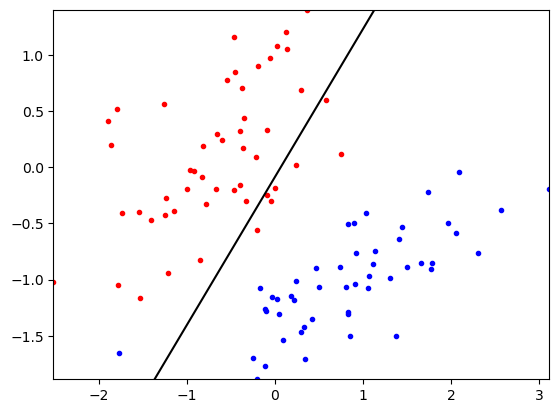

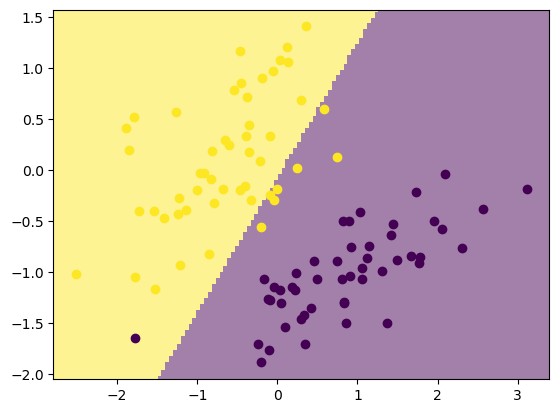

In [9]:
class myLogistic2(logisticClassify):  # override methods here for solution doc
    regularize_train = L2


learnerA = myLogistic2()
learnerA.theta = np.array([0.0, 0.0, 0.0])
learnerA.regularize_train(
    XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5, alpha=2.0
)
plt.figure()

ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))